In [138]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((32, 32))])
train_set = datasets.MNIST(root='./.data', transform=transform, train=True, download=True)
test_set = datasets.MNIST(root='./.data', transform=transform, train=False, download=True)

In [139]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [140]:
from torch import nn


class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x).flatten(start_dim=1)
        return self.layer3(x)

In [141]:
import torch

model = LeNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [142]:
def train(model: nn.Module, loader: DataLoader, optimizer) -> tuple[float, float]:
    model.train()
    loss = 0
    accuracy = 0.0
    for images, labels in loader:
        optimizer.zero_grad()
        predictions = model(images)
        c_loss = criterion(predictions, labels)
        c_loss.backward()
        optimizer.step()
        loss += c_loss.item() * images.shape[0]
        accuracy += (predictions.argmax(dim = 1) == labels).sum().item()
    return loss / len(loader.dataset), accuracy / len(loader.dataset)

In [143]:
def test(model: nn.Module, loader: DataLoader) -> tuple[float, float]:
    model.eval()
    loss = 0
    accuracy = 0
    for images, labels in loader:
        predictions = model(images)
        c_loss = criterion(predictions, labels)
        loss += c_loss.item() * images.shape[0]
        accuracy += (predictions.argmax(dim = 1) == labels).sum().item()
    return loss / len(loader.dataset), accuracy / len(loader.dataset)

In [144]:
num_epochs = 5
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
train_loss, train_accuracy = 0, 0
test_loss, test_accuracy = 0, 0
print('start training...')
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer)
    test_loss, test_accuracy = test(model, test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(
        'train loss:' + str(train_loss) + "\t" +
        'test loss: ' + str(test_loss) + "\t" +
        'train accuracy: ' + str(train_accuracy) + "\t" +
        'test accuracy: ' + str(test_accuracy)
    )

start training...
train loss:0.5123072658320268	test loss: 0.12946089463829993	train accuracy: 0.8363166666666667	test accuracy: 0.9593
train loss:0.11602891744325558	test loss: 0.09370268597044051	train accuracy: 0.96385	test accuracy: 0.9703
train loss:0.07910826164335012	test loss: 0.0589944768326357	train accuracy: 0.9758166666666667	test accuracy: 0.9807
train loss:0.06255805119425058	test loss: 0.053562680964265016	train accuracy: 0.9804	test accuracy: 0.9834
train loss:0.05065988943244641	test loss: 0.05026963598569855	train accuracy: 0.9838166666666667	test accuracy: 0.9847


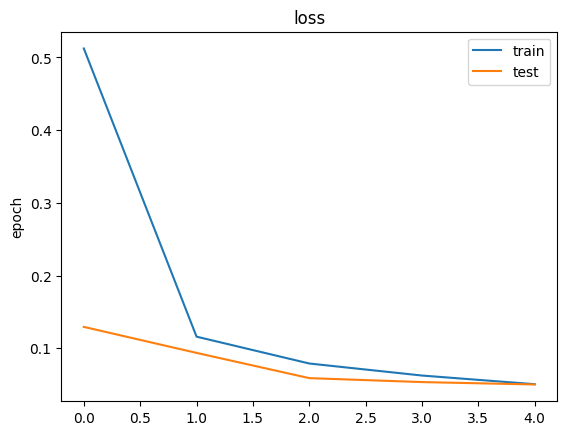

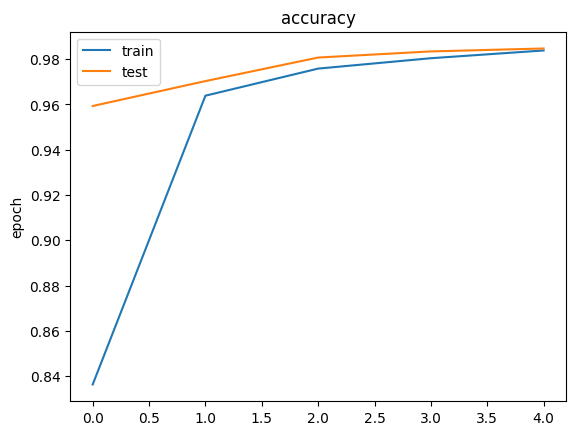

In [145]:
import matplotlib.pyplot as plt

epochs = range(num_epochs)
plt.plot(epochs, train_losses, label='train')
plt.plot(epochs, test_losses, label='test')
plt.title('loss')
plt.ylabel('epoch')
plt.legend()
plt.show()
plt.plot(epochs, train_accuracies, label='train')
plt.plot(epochs, test_accuracies, label='test')
plt.title('accuracy')
plt.ylabel('epoch')
plt.legend()
plt.show()

In [146]:
print('train loss', train_loss)
print('test loss', test_loss)
print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train loss 0.05065988943244641
test loss 0.05026963598569855
train accuracy 0.9838166666666667
test accuracy 0.9847
